In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Check the Shape
xtrain.shape, xtest.shape

((60000, 28, 28), (10000, 28, 28))

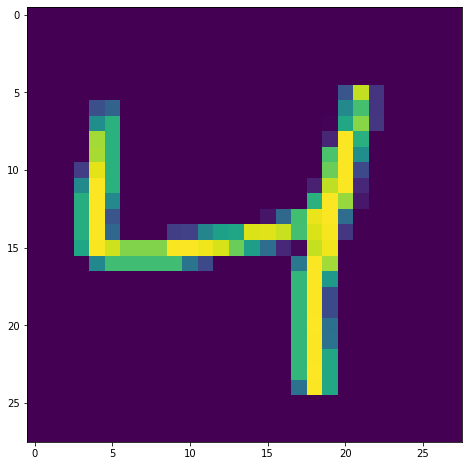

Corresponding class to the image:  4


In [4]:
# Plot the image
plt.figure(figsize=(8,8))
plt.imshow(xtrain[2])
plt.show()

print("Corresponding class to the image: ",ytrain[2])

In [5]:
xtrain = xtrain.reshape(xtrain.shape[0], 28,28,1)
xtest = xtest.reshape(xtest.shape[0], 28,28,1)
input_shape = (28,28,1)

In [6]:
xtrain = xtrain.astype("float32")
xtest = xtest.astype("float32")

xtrain /= 255
xtest /= 255

In [7]:
# convert class vectors to binary class matrices
from tensorflow.keras.utils import to_categorical

In [8]:
ytrain = to_categorical(y=ytrain, num_classes=10)
ytest = to_categorical(y=ytest, num_classes=10)

# Let's Create our CNN model

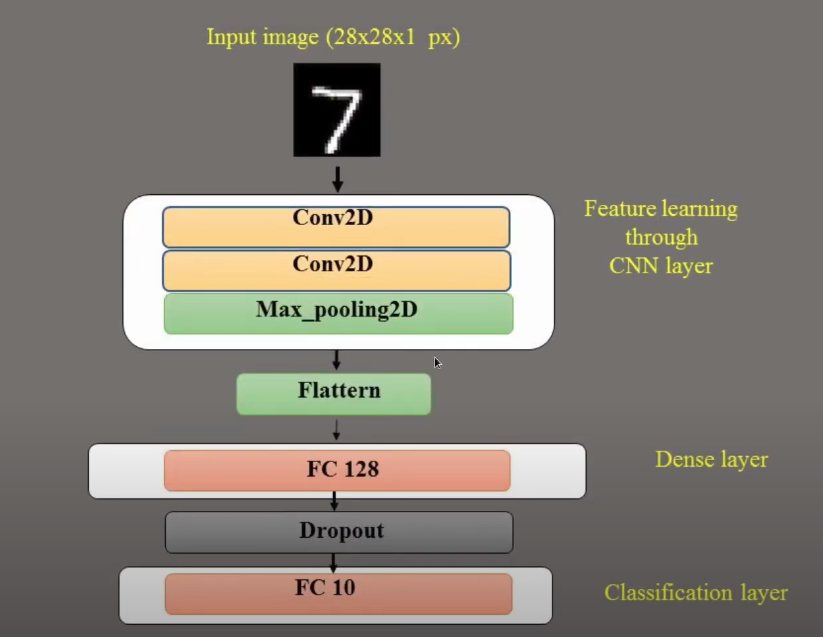




In [9]:
# Model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(rate=0.5)) # to reduce the overfit condition
model.add(Flatten()) # to convert multidimantation to one dimantation for Dense layers
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(rate=0.5)) # to reduce the overfit condition
# Output layers
model.add(Dense(units=10, activation='softmax'))

In [10]:
summary = model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [11]:
from tensorflow.keras import optimizers
from keras.losses import categorical_crossentropy # or
# from tensorflow.keras.losses import categorical_crossentropy

In [12]:
model.compile(optimizer=optimizers.Adam(),loss=categorical_crossentropy,metrics=['accuracy'])

In [13]:
history = model.fit(x=xtrain, 
                    y=ytrain, 
                    batch_size=128, 
                    epochs=14,
                    verbose=1,
                    validation_data=(xtest,ytest))

Epoch 1/14
469/469 [==============================] - 36s 9ms/step - loss: 0.2556 - accuracy: 0.9220 - val_loss: 0.0571 - val_accuracy: 0.9821
Epoch 2/14
469/469 [==============================] - 4s 8ms/step - loss: 0.0975 - accuracy: 0.9714 - val_loss: 0.0405 - val_accuracy: 0.9871
Epoch 3/14
469/469 [==============================] - 4s 8ms/step - loss: 0.0760 - accuracy: 0.9779 - val_loss: 0.0332 - val_accuracy: 0.9890
Epoch 4/14
469/469 [==============================] - 4s 8ms/step - loss: 0.0611 - accuracy: 0.9810 - val_loss: 0.0313 - val_accuracy: 0.9898
Epoch 5/14
469/469 [==============================] - 4s 8ms/step - loss: 0.0553 - accuracy: 0.9827 - val_loss: 0.0289 - val_accuracy: 0.9898
Epoch 6/14
469/469 [==============================] - 4s 8ms/step - loss: 0.0473 - accuracy: 0.9855 - val_loss: 0.0306 - val_accuracy: 0.9896
Epoch 7/14
469/469 [==============================] - 4s 8ms/step - loss: 0.0462 - accuracy: 0.9854 - val_loss: 0.0288 - val_accuracy: 0.9916
Epoch

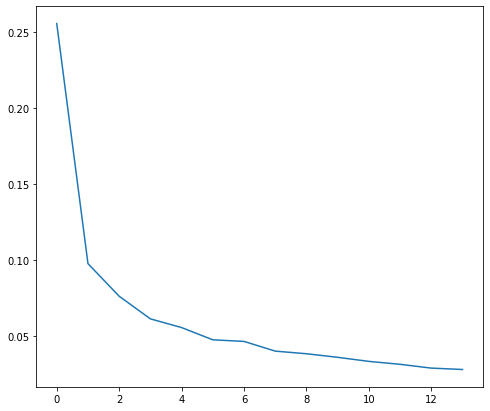

In [14]:
plt.figure(figsize=(8,7))
plt.plot(history.history['loss'])
plt.show()

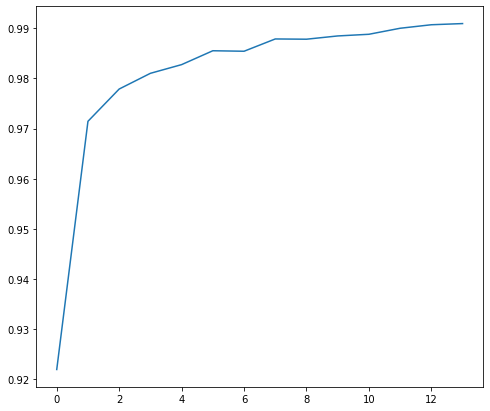

In [15]:
plt.figure(figsize=(8,7))
plt.plot(history.history['accuracy'])
plt.show()

In [16]:
score = model.evaluate(x=xtest, y=ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0255 - accuracy: 0.9925


In [17]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.025526024401187897
Test accuracy: 0.9925000071525574


In [18]:
# Save the model
# model.save(filepath="/content/drive/MyDrive/Deep Learning/Supervised Learning/CNN With Keras/Classify Dights Using CNN/model_CNN.h5")